# Notebook of a Numerical Solution: Moon and Earth (draft)

In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

Suppose God has had it with the earth. However this time, instead of a flood, She decides to stop
Earth and the moon in their orbits, hold the earth still, release the moon from rest, and allow the
moon to crash into the fixed earth.
You are a young physicist working for NASA and decide, in your remaining hours, to estimate
the speed at which the moon will strike Earth and how long it will take to do so. According to
your official NASA handbook, the mass of Earth is $M_E = 6.0 × 10^{24}$ kg, the mass of the moon
is $M_M = 7.4 × 10^{22}$ kg, the radius of Earth is $R_E = 6.4 × 10^6$ m, and the radius of the moon is
$R_M = 1.7 × 10^6$ m. The centers of Earth and moon are initially apart by $D = 3.8 × 10^8$ m.
Because of your physics training at a small liberal arts college, you know that the force, $F_{EM}[x]$,
exerted by Earth on the moon is given by Newton’s Universal Law of Gravitation: $\frac{−GM_EM_M}{x^2}$.
Here x is the position of the center of the moon relative to the center of Earth, the x-axis points
from Earth to the moon, and G is the universal gravitational constant $6.67 × 10^{−11}$ Nm^2/kg^2.

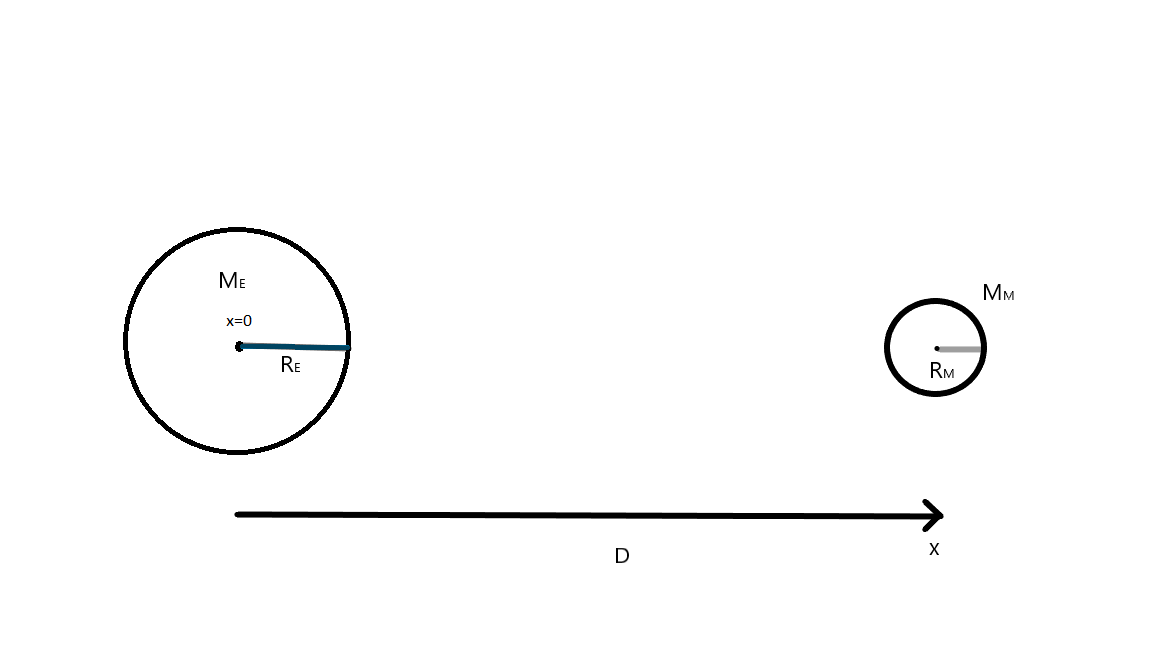

Respond to the following question: **What force(s) are acting on the system? Can we apply conservation of energy to this problem?**

Next, starting from the definition of potential energy, that the potential energy associated with the force $F_{EM}[x]$ is given by $\frac{−GM_EM_M}{x}$. Be sure to mention what happened to your
constant of integration.

In [2]:
init_printing(use_unicode=False,wrap_line=False)
x=Symbol('x')
G=Symbol('G')
m=Symbol('M_{E}')
mm=Symbol('M_{M}')
integrate((G*m*mm)/x**2,x)

C should be 0 since V(x)=0 as x goes to infinity

Plot a potential energy diagram, using your result in the previous part. Make sure to describe qualitative elements of the plot! You can do this by making vertical and horizontal lines at certain points to indicate a certain value of importance on the axis. It may be a good idea to make a close up plot in which the difference in values is easily identifiable.

<ipython-input-26-ffc0c1db82dc>:9: RuntimeWarning: divide by zero encountered in true_divide
  V=-(G*m*mm)/x


Text(0.5, 1.0, 'Plot of potential energy vs distance from center of the earth')

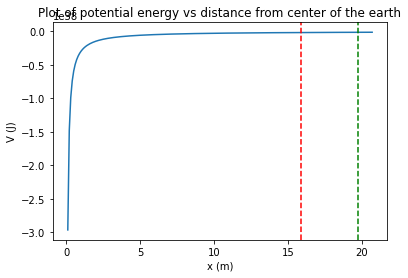

In [26]:
G=6.67*10**(-11)
m=6.0*10**(24)
mm=7.4*10**(22)
x=np.arange(0,np.log(10**9),0.1)
D=np.log(3.8*10**8)
re=6.4*10**6
rm=1.7*10**6
rc=np.log(re+rm)
V=-(G*m*mm)/x
plt.plot(x,V)
plt.axvline(x=D,linestyle='dashed',color='green')
plt.axvline(x=rc, linestyle='dashed',color='red')
plt.ylabel('V (J)')
plt.xlabel('x (m)')
plt.title("Plot of potential energy vs distance from center of the earth")


Text(0.5, 1.0, 'Close up Plot of potential energy vs distance from center of the earth')

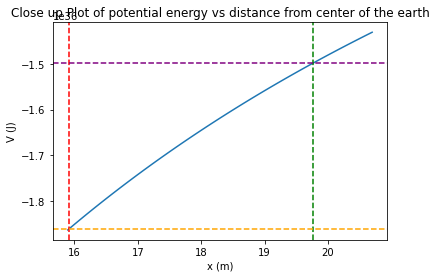

In [38]:
x_close=np.arange(np.log(8*10**6),np.log(10**9),0.1)
V_close=-(G*m*mm)/x_close
plt.plot(x_close,V_close)
plt.axvline(x=D,linestyle='dashed',color='green')
plt.axvline(x=rc, linestyle='dashed',color='red')
plt.axhline(y=-1.499*10**36,linestyle='dashed', color='purple')
plt.axhline(y=-1.862*10**36,linestyle='dashed', color='orange')
plt.ylabel('V (J)')
plt.xlabel('x (m)')
plt.title("Close up Plot of potential energy vs distance from center of the earth")

In the  plot above we observe potential energy as a function of $x$. The moon starts from rest at $x=D$, shown by the green dashed line, the purple line indicates the total energy of the system $E_T$, meaning that that at $x=D$ the entire energy of the system is potential energy. At the red line the moon hits the earth, at that point the orange the distance between the orange and purple line is the final kinetic energy of the system.

Next we want to find a symbolic expression for the speed of the moon as a function of $x$ in terms of the
parameters given in the problem and the symbols you introduced.

We use the value for the final kinetic eenrgy of the system which we have found above. To produce a numerical result.

In [86]:
#after some algebra the expression for the final velocity should be as follows
G=6.67*10**(-11)
m=6.0*10**(24)
D=3.8*10**8
re=6.4*10**6
rm=1.7*10**6
xc=re+rm
vf=-np.sqrt((2*G*m)/xc*(1-(xc/D)))
print(vf)

-9834.047947073532


Use your result for the final velocity of the moon to find the time to impact $t_c$. You should leave your answer in integral form.

We have that $\frac{dx}{dt}=-\sqrt(\frac{2GM_E}{D}(\frac{D}{x}-1)$ so we separate the variables and solve the ODE, $\int_{0}^{t_c} \,dt = \int_{0}^{x_c} \frac{-1}{\sqrt(\frac{2GM_E}{D}(\frac{D}{x}-1)} \,dx $. We have to factor out the constants, so $t_c=-\sqrt(\frac{D}{2GM_E})\int_{0}^{x_c} \frac{1}{\sqrt(\frac{D}{x}-1)} \,dx$. We can now substitute $s=\frac{x}{D}$, to get $t_c=-\frac{D^{1.5}}{\sqrt(2GM_E)}\int_{1}^{\frac{x_c}{D}} \sqrt(\frac{s}{1-s}) \,ds$.

In [ ]:
#not sure of we can integrate this on Python, we might need to just do it by hand.

Finally, integrate $t_c$ using numerical methods in order to find out how long we have until the moons hits the earth.

In [91]:
from math import cos, exp, pi, sqrt
from scipy.integrate import quad

# function we want to integrate
def f(s):
    return -(D**1.5)/(np.sqrt(2*G*m))*np.sqrt((s)/(1-s))

# call quad to integrate f from -2 to 2
res, err = quad(f, 1, xc/D)
print(res/(24*3600))

4.753902533873542


This means we have 4.75 days ledt until the world is over!